<a href="https://colab.research.google.com/github/RichardLowther/MAT-421/blob/main/Module_B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Richard Lowther

MAT 421 HW 3

Chapter 17

17.4 Lagrange Polynomial Interpolation

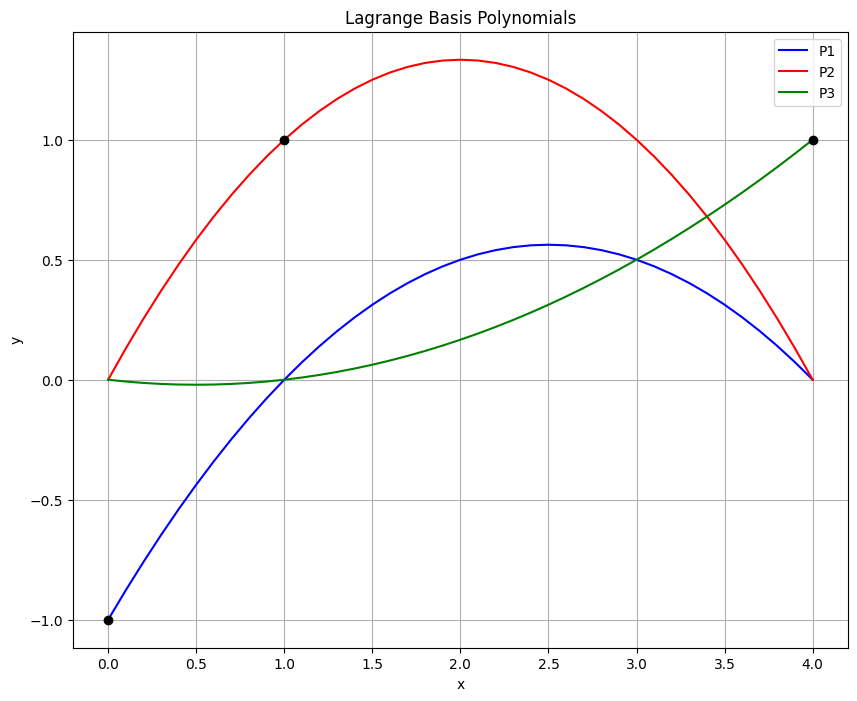

In [33]:
# Lagrange polynomial interpolation finds a single polynomial that goes through all the data points

import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

x = [0, 1, 4]
y = [-1, 1, 1]
P1_coeff = [-1, 1.25, -0.25]
P2_coeff = [0, 4/3, -1/3]
P3_coeff = [0, -1/12, 1/12]

# get the polynomial function
P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)

x_new = np.arange(0, 4.1, 0.1)

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, P1(x_new), 'b', label = 'P1')
plt.plot(x_new, P2(x_new), 'r', label = 'P2')
plt.plot(x_new, P3(x_new), 'g', label = 'P3')

plt.plot(x,y, 'o', color = "black")
plt.title('Lagrange Basis Polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

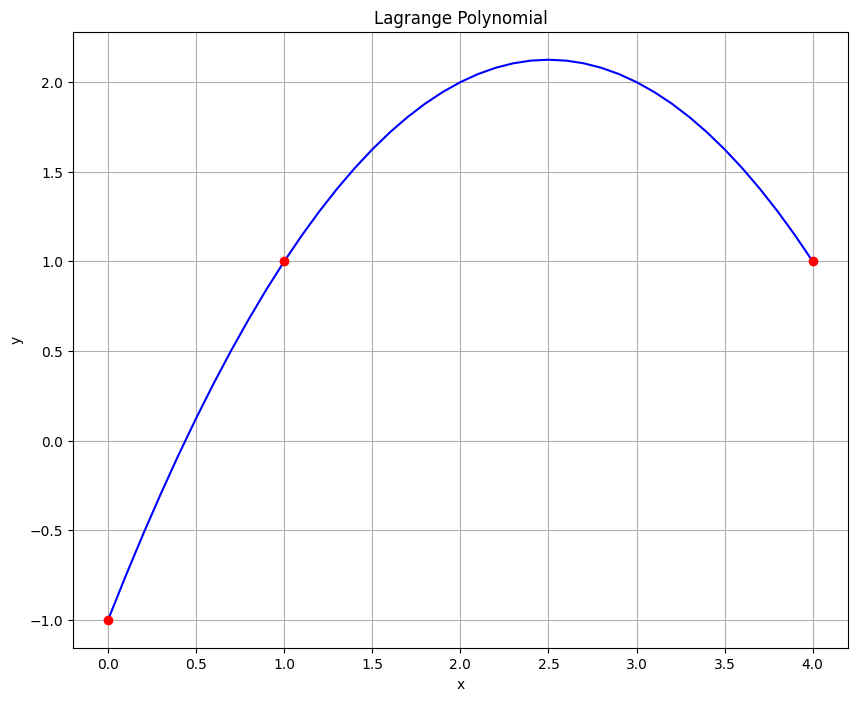

In [34]:
L = P1 + P2 + P3

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, L(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

17.5 Newton’s Polynomial Interpolation

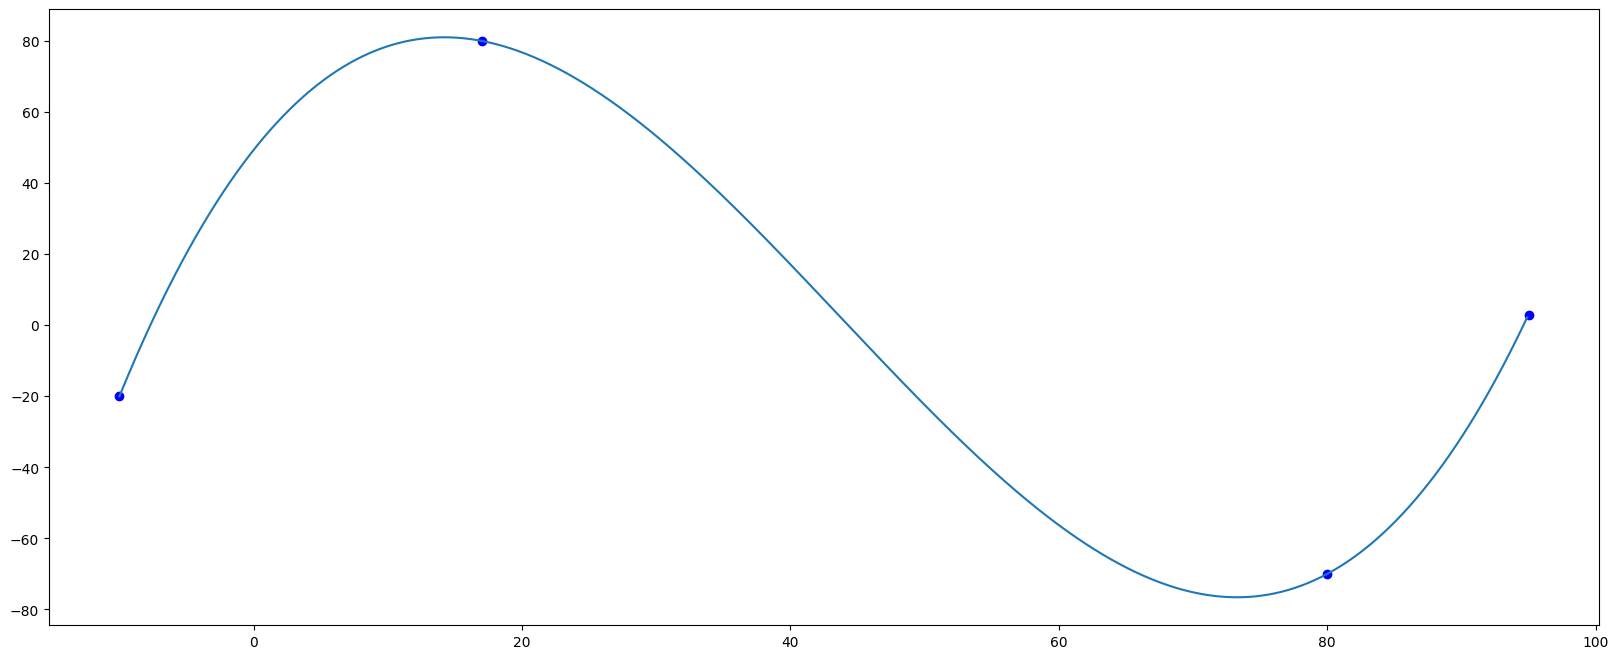

In [35]:
# Can also interpolate polynomial functions, where the coefficients of the polynomial are calculated using Newton's divided differences method

import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y

    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial
    at x
    '''
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p
x = np.array([-10, 17, 80, 95])
y = np.array([-20, 80, -70, 3])
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(-10, 95, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (20, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)
